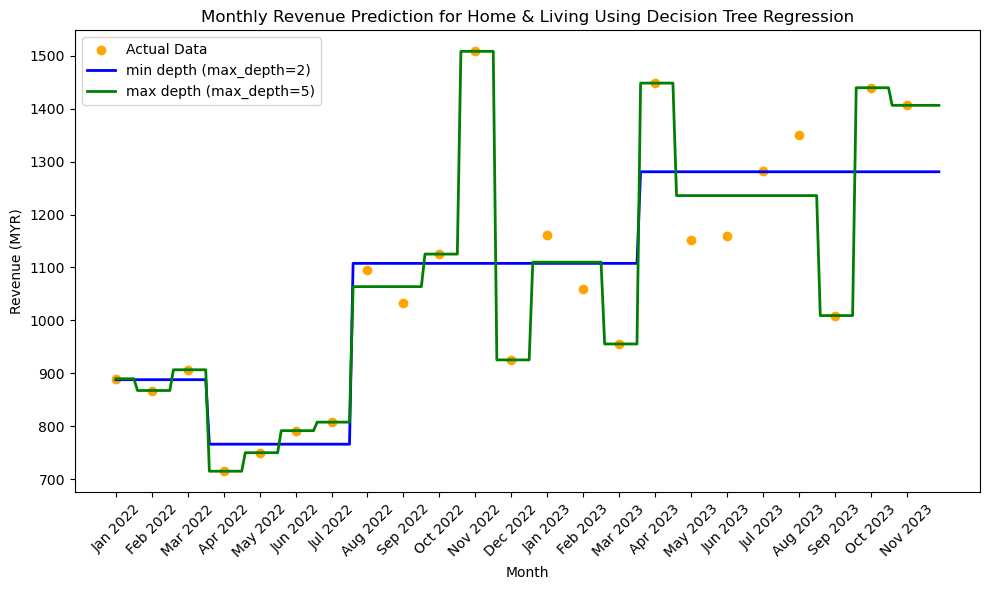

In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Define the file path to the CSV file
file_path = 'shopee_sales_report_2022_to_2024.csv'

# Function to load and preprocess data from the CSV file
def load_and_preprocess_shopee_data(file_path):
    # Load data from CSV file
    data = pd.read_csv(file_path)

    # Filter for "Home & Living" product category
    data_filtered = data[data['Product Category'] == 'Home & Living'].copy()

    # Convert 'DateTime' to datetime format with dayfirst=True to avoid parsing issues
    data_filtered['DateTime'] = pd.to_datetime(data_filtered['DateTime'], dayfirst=True, errors='coerce')
    
    # Extract month and year, then group by month to calculate total revenue per month
    data_filtered['MonthYear'] = data_filtered['DateTime'].dt.to_period('M')
    grouped_data = data_filtered.groupby('MonthYear')['Revenue (MYR)'].sum().reset_index()
    grouped_data['MonthYear'] = grouped_data['MonthYear'].dt.to_timestamp()  # Convert Period to Timestamp

    return grouped_data

# Load and preprocess the data
grouped_data = load_and_preprocess_shopee_data(file_path)

# Check if data is loaded successfully
if not grouped_data.empty:
    # Prepare the full dataset for modeling
    grouped_data['MonthNumber'] = np.arange(len(grouped_data))  # Numeric month sequence for modeling
    X_full = grouped_data[['MonthNumber']]
    y_full = grouped_data['Revenue (MYR)']

    # Generate high-resolution data for smoother step functions, with proper column name
    X_high_res = pd.DataFrame({'MonthNumber': np.arange(X_full['MonthNumber'].min(), X_full['MonthNumber'].max() + 1, 0.1)})

    # Train and plot decision tree regressions with different max_depths
    plt.figure(figsize=(10, 6))

    # Plot actual data points
    plt.scatter(X_full, y_full, color='orange', label='Actual Data')

    # Decision tree with min depth (max_depth=2)
    model_depth_min = DecisionTreeRegressor(max_depth=2, random_state=0)
    model_depth_min.fit(X_full, y_full)
    predictions_depth_min = model_depth_min.predict(X_high_res)
    plt.plot(X_high_res, predictions_depth_min, color='blue', label='min depth (max_depth=2)', linewidth=2)

    # Decision tree with max depth (max_depth=5)
    model_depth_max = DecisionTreeRegressor(max_depth=5, random_state=0)
    model_depth_max.fit(X_full, y_full)
    predictions_depth_max = model_depth_max.predict(X_high_res)
    plt.plot(X_high_res, predictions_depth_max, color='green', label='max depth (max_depth=5)', linewidth=2)

    # Replace MonthNumber with month names starting from Jan 2022
    month_labels = pd.date_range(start="2022-01-01", periods=len(X_full), freq='MS').strftime('%b %Y')
    plt.xticks(ticks=X_full['MonthNumber'], labels=month_labels, rotation=45)

    # Add labels and title
    plt.xlabel('Month')
    plt.ylabel('Revenue (MYR)')
    plt.title('Monthly Revenue Prediction for Home & Living Using Decision Tree Regression')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No data available to build the prediction model.")
